# Gases de Invernadero y Química de la Lluvia
Métodos Numéricos en Ingeniería Ambiental 

## 1. Introducción y Contexto

### 1.1 Objetivos de Aprendizaje

1. Analizar la tendencia del aumento de CO2 atmosférico y su impacto en la química del agua de lluvia.
2. Aplicar el método de bisección para resolver ecuaciones no lineales en problemas ambientales complejos.
3. Interpretar resultados numéricos en el contexto de cambios ambientales a largo plazo, considerando las escalas logarítmicas.
4. Evaluar la precisión y eficiencia de los métodos numéricos en aplicaciones de ingeniería ambiental.

### 1.2 Antecedentes
- La ingeniería ambiental aborda problemas globales como el cambio climático.
- Enfoque en el control de contaminación y en problemas más amplios como el cambio climático.
- Importancia de los métodos numéricos en el análisis de tendencias ambientales.

## 2. Aumento de CO2 Atmosférico

### 2.1 Datos Históricos
- Mediciones de CO2 en Mauna Loa, Hawai, de 1958 a 2003.
- Aumento de 315 ppm en 1958 a 376 ppm en 2003 (19% de incremento).

![](./img/maunaloa.png)

**Figura1:** Promedio anual de presiones parciales de dióxido de carbono atmosférico [ppm] medidas en
Mauna Loa, Hawai.

### 2.2 Modelo Matemático
Ecuación para la presión parcial de CO2:

$$
p_{CO_2} = 0.011825(t - 1980.5)^2 + 1.356975(t - 1980.5) + 339
$$

Donde:
- $p_{CO_2}$ = presión parcial de CO2 [ppm]
- $t$ = año

## 3. Impacto en la Química del Agua de Lluvia

El dióxido de carbono es el principal determinante del pH de la lluvia

¿cómo la tendencia de aumento en el dióxido de carbono está afectando el pH del agua de lluvia?


### 3.1 pH y su Importancia
- Definición de pH: $pH = -\log_{10}[H^+]$
- Importancia del pH en sistemas acuáticos y terrestres

### 3.2 Sistema de Ecuaciones para la Química del Agua de Lluvia
Sistema no lineal de cinco ecuaciones:

1. $$K_1 = \frac{[H^+][HCO_3^-]}{K_H p_{CO_2}}$$
2. $$K_2 = \frac{[H^+][CO_3^{2-}]}{[HCO_3^-]}$$
3. $$K_w = [H^+][OH^-]$$
4. $$c_T = \frac{K_H p_{CO_2}}{10^6} + [HCO_3^-] + [CO_3^{2-}]$$
5. $$0 = [HCO_3^-] + 2[CO_3^{2-}] + [OH^-] - [H^+]$$

Donde:
- $K_H = 10^{-1.46}$ (constante de Henry)
- $K_1 = 10^{-6.3}$, $K_2 = 10^{-10.3}$, $K_w = 10^{-14}$ (coeficientes de equilibrio)

## 4. Aplicación del Método de Bisección


### 4.1 Simplificación del Sistema de Ecuaciones
Reducción a una ecuación en términos de $[H^+]$:

$$
0 = \frac{K_1}{[H^+]}\cdot K_H \cdot p_{CO_2}\  + \  2 \cdot \frac{K_2 \cdot K_1}{ [H^+]^2}\cdot K_H \cdot p_{CO_2}\  + \ \frac{K_w}{[H^+]} 10^6 - 10^6 [H^+]
$$

Multiplicamos por [$H^+]^2$

$$0 = K_1 \cdot K_H \cdot  p_{CO2} \cdot [H+] \ + \ 2K_2 \cdot K_1 \cdot K_H \cdot p_{CO2}  \ + \  K_w \cdot [H+] \cdot 10^6 - [H+]^3 \cdot 10^6 $$

### 4.2 Justificación del Método de Bisección
1. Rango conocido de pH: entre 2 y 12 (límites de búsqueda: $10^{-12}$ a $10^{-2}$ para $[H^+]$)
2. Precisión requerida: dos decimales en pH (error absoluto 10^-10)
3. Cálculo a priori del número de iteraciones: $n = \log_2(10)/0.005 \approx 11$ iteraciones

### 4.3 Implementación del Método de Bisección

In [19]:
import math
import numpy as np
import matplotlib.pyplot as plt

def f(H, p_CO2):
    KH = 10**-1.46
    K1 = 10**-6.3
    K2 = 10**-10.3
    Kw = 10**-14
    return K1 * KH * p_CO2 * H + 2 * K2 * K1 * KH * p_CO2 + Kw * H * 10**6 - H**3 * 10**6

def bisection(f, a, b, tol=10**-10, max_iter=500, p_CO2=315):
    if f(a, p_CO2) * f(b, p_CO2) >= 0:
        raise ValueError("La función debe tener signos opuestos en a y b")
    
    for i in range(max_iter):
        c = (a + b) / 2
        if f(c, p_CO2) == 0 or (b - a) / 2 < tol:
            return c
        if f(c, p_CO2) * f(a, p_CO2) < 0:
            b = c
        else:
            a = c
    
    return (a + b) / 2

# Cálculo para 1958 y 2003
H_1958 = bisection(f, 10**-13, 10**-2, p_CO2=315)
H_2003 = bisection(f, 10**-13, 10**-2, p_CO2=376)

pH_1958 = -math.log10(H_1958)
pH_2003 = -math.log10(H_2003)

print(f"pH en 1958: {pH_1958:.4f}")
print(f"pH en 2003: {pH_2003:.4f}")



pH en 1958: 5.6305
pH en 2003: 5.5921


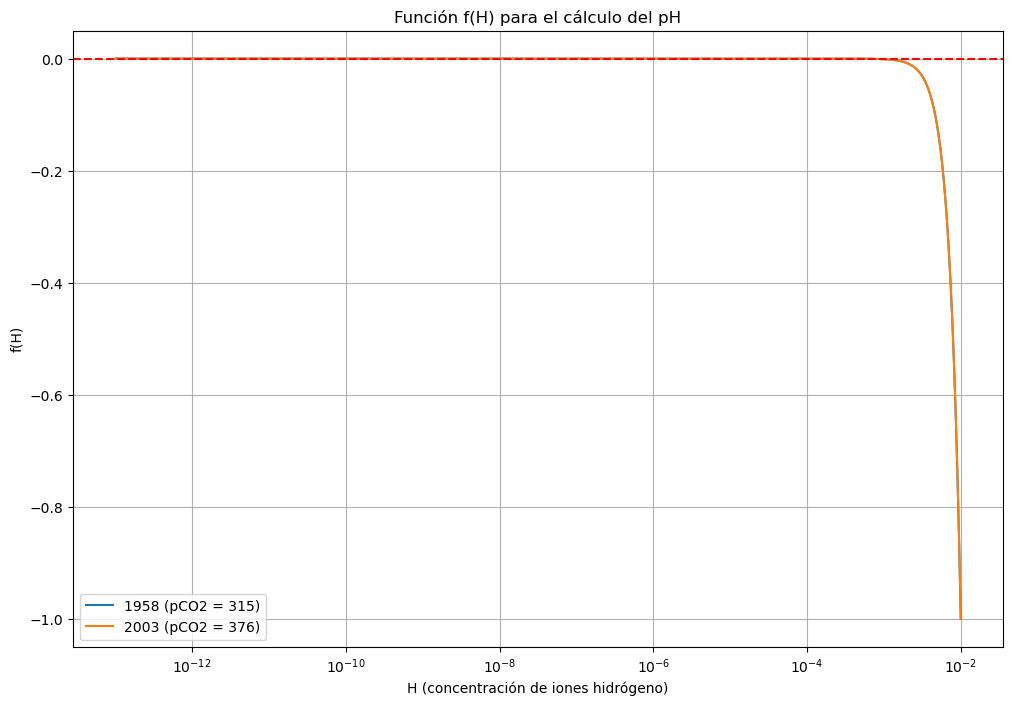

In [20]:
# Graficar la función
H_values = np.logspace(-13, -2, 1000)
f_values_1958 = [f(H, 315) for H in H_values]
f_values_2003 = [f(H, 376) for H in H_values]

plt.figure(figsize=(12, 8))
plt.semilogx(H_values, f_values_1958, label='1958 (pCO2 = 315)')
plt.semilogx(H_values, f_values_2003, label='2003 (pCO2 = 376)')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('H (concentración de iones hidrógeno)')
plt.ylabel('f(H)')
plt.title('Función f(H) para el cálculo del pH')
plt.legend()
plt.grid(True)
plt.show()

## 5. Análisis de Resultados

### 5.1 Cambio en el pH del Agua de Lluvia
- pH en 1958: 5.6305
- pH en 2003: 5.5921
- Disminución del 0.67% en pH

### 5.2 Interpretación Detallada
- Cambio en concentración de iones de hidrógeno: $[H^+] = 10^{-pH}$
  - 1958: $[H^+] = 2.3553 \times 10^{-6}$ mol/L
  - 2003: $[H^+] = 2.5704 \times 10^{-6}$ mol/L
- Aumento del 9.1% en la concentración de iones de hidrógeno
- Discusión sobre la escala logarítmica del pH y su significado en términos de acidificación

## 6. Implicaciones y Discusión

### 6.1 Impacto Ambiental
- Análisis del impacto de un aumento del 19% en CO2 atmosférico sobre la acidez de la lluvia
- Discusión sobre las implicaciones a largo plazo de esta tendencia

### 6.2 Importancia de los Métodos Numéricos en Ingeniería Ambiental
- Rol crucial en el análisis de sistemas no lineales complejos
- Capacidad de predecir y modelar cambios ambientales a largo plazo
- Importancia en la toma de decisiones basada en evidencia científica

## 7. Ejercicios Prácticos Avanzados

1. Modificar el código para calcular el pH en intervalos de 10 años desde 1958 hasta 2023. Graficar la tendencia.
2. Investigar y aplicar otro método numérico (e.g., Newton-Raphson) para resolver este problema. Comparar eficiencia y precisión con el método de bisección.
3. Analizar cómo cambiaría el pH si los niveles de CO2 alcanzaran 450 ppm. Discutir las implicaciones ecológicas.
4. Explorar cómo otros factores (e.g., emisiones de SO2) podrían afectar el pH de la lluvia. Proponer un modelo matemático ampliado.

## 8. Conclusión

- Recapitulación de la importancia de los métodos numéricos en el análisis de problemas ambientales complejos
- Énfasis en la necesidad de interpretar resultados numéricos en el contexto de sistemas ambientales más amplios
- Discusión sobre el papel de los ingenieros ambientales en abordar desafíos globales como el cambio climático

## 9. Referencias y Lecturas Adicionales

1. IPCC. (2021). Climate Change 2021: The Physical Science Basis.
2. Chapra, S.C., & Canale, R.P. (2015). Numerical Methods for Engineers. McGraw-Hill Education.
3. Seinfeld, J.H., & Pandis, S.N. (2016). Atmospheric Chemistry and Physics: From Air Pollution to Climate Change. John Wiley & Sons.
4. Stumm, W., & Morgan, J.J. (2012). Aquatic Chemistry: Chemical Equilibria and Rates in Natural Waters. John Wiley & Sons.
5. National Oceanic and Atmospheric Administration. (2021). Trends in Atmospheric Carbon Dioxide. [https://www.esrl.noaa.gov/gmd/ccgg/trends/](https://www.esrl.noaa.gov/gmd/ccgg/trends/)
